In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from scipy.stats import randint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [138]:
# Import dataframe

mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')
both = pd.merge(mat, por, how='outer', suffixes=['_mat','_por'], on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [139]:
# Encoding dummy variables

math = pd.get_dummies(mat, drop_first=True)
Port = pd.get_dummies(por, drop_first=True)

# **Mathematics Dataset**

In [140]:
# Train & Test samples for Mathematics

Xm = math.drop('G3', axis=1)
ym = math['G3']

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym, test_size=0.2, random_state=24)

In [141]:
# Repeated K-Fold cross validator

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)

# **Random Forest Regression**

In [6]:
# Random Forest Regression (GridSearchCV)
# Finding best parameters

rfr = RandomForestRegressor()
params = {'n_estimators':[100,250,500,750],
          'min_samples_split':list(np.arange(2,10,2)),
          'min_samples_leaf':list(np.arange(2,10,2)),
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],
          'min_impurity_decrease':[0,0.1,0.2,0.5],
          'max_features':['auto','sqrt','log2']}

rfr_grid = GridSearchCV(rfr, params, cv=5)
rfr_grid.fit(Xm_train, ym_train)

print(rfr_grid.best_params_)

{'max_features': 'auto', 'min_impurity_decrease': 0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0, 'n_estimators': 250}


In [142]:
# Random Forest Regression (Final)

rfr_final = RandomForestRegressor(n_estimators = 250, min_samples_split = 6,
                             min_samples_leaf = 4, min_weight_fraction_leaf=0,
                            min_impurity_decrease = 0, max_features = 'auto' )
rfr_final.fit(Xm_train, ym_train)

random_forest_final_score = cross_val_score(rfr_final,Xm_train, ym_train,cv=cv).mean()
print("Cross Validation score: ",random_forest_final_score)

Cross Validation score:  0.85823969638046


In [143]:
# Random Forest Regression (Original)

rfr = RandomForestRegressor()
rfr.fit(Xm_train, ym_train)

random_forest_score = cross_val_score(rfr,Xm_train, ym_train,cv=cv).mean()
print("Cross Validation score: ", random_forest_score)

Cross Validation score:  0.8513755735370848


# **Gradient Boosting Regression**

In [17]:
# Gradient Boosting Regression (GridSearchCV)
# Finding best parameters

gradient = GradientBoostingRegressor()

params = {'n_estimators':[250,500,750,1000],
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],
          'max_depth':list(np.arange(3,11,1)),
          'min_impurity_decrease':[6,10,12,14,16]}

gradient_grid = GridSearchCV(gradient, params, cv=5)
gradient_grid.fit(Xm_train, ym_train)
print(gradient_grid.best_params_)

{'max_depth': 4, 'min_impurity_decrease': 12, 'min_weight_fraction_leaf': 0, 'n_estimators': 750}


In [144]:
# Gradient Boosting Regression (Final)

gradient_final = GradientBoostingRegressor(n_estimators=750, min_weight_fraction_leaf = 0,
                                   max_depth = 4, min_impurity_decrease = 12 )
gradient_final.fit(Xm_train, ym_train)

gradient_boosting_final_score = cross_val_score(gradient_final,Xm_train, ym_train,cv=cv).mean()
print("Cross Validation score: ",gradient_boosting_final_score)

Cross Validation score:  0.8639500607821902


In [145]:
# Gradient Boosting Regression (Original)

gradient = GradientBoostingRegressor()
gradient.fit(Xm_train, ym_train)

gradient_boosting_score = cross_val_score(gradient,Xm_train, ym_train,cv=cv).mean()
print("Cross Validation score: ",gradient_boosting_score)

Cross Validation score:  0.8569597028536252


# **XGBoost**

In [11]:
# XGBoost (GridSearchCV)

xgboost = XGBRegressor()

params = {'eta':[0.1,0.3,0.5],
         'gamma':[5,10,15,20],
         'max_depth':[3,6,7,9],
         'min_child_weight':[1,2,3,4],
         'max_delta_step':[0,2,5,8,10,12],
         'subsample':[0.9, 0.95,1],
         'alpha':[0,1,2],
         'lambda':[1,2,3]}

xg_grid = GridSearchCV(xgboost, params, cv=5)

xg_grid.fit(Xm_train, ym_train)

print(xg_grid.best_params_)

{'alpha': 0, 'eta': 0.3, 'gamma': 15, 'lambda': 2, 'max_delta_step': 10, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.9}


In [146]:
# XGBoost(Final)

xgboost_final = XGBRegressor(eta=0.3, gamma = 15, max_depth = 7, min_child_weight = 2,
                      max_delta_step = 10, subsample = 0.9, alpha = 0, reg_lambda = 2)
xgboost_final.fit(Xm_train, ym_train)

xgboost_final_score = cross_val_score(xgboost_final,Xm_train, ym_train,cv=cv).mean()
print("Cross Validation score: ",xgboost_final_score)

Cross Validation score:  0.8721941752670935


In [147]:
# XGBoost (Original)

xgboost = XGBRegressor()
xgboost.fit(Xm_train, ym_train)

xgboost_score = cross_val_score(xgboost,Xm_train, ym_train,cv=cv).mean()
print("Cross Validation score: ", xgboost_score)

Cross Validation score:  0.8411025765671091


# **Cross Validation Score**

In [148]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [149]:
name = ['Random Forest','Gradient Boosting', 'XGBoost']
x_indexes = np.arange(len(name))
width = 0.4

cv_score = [random_forest_score, gradient_boosting_score, xgboost_score]
cv_score_round = [round(score, 4) for score in cv_score]

cv_score_final = [random_forest_final_score, gradient_boosting_final_score, xgboost_final_score]
cv_score_final_round = [round(score, 4) for score in cv_score_final]

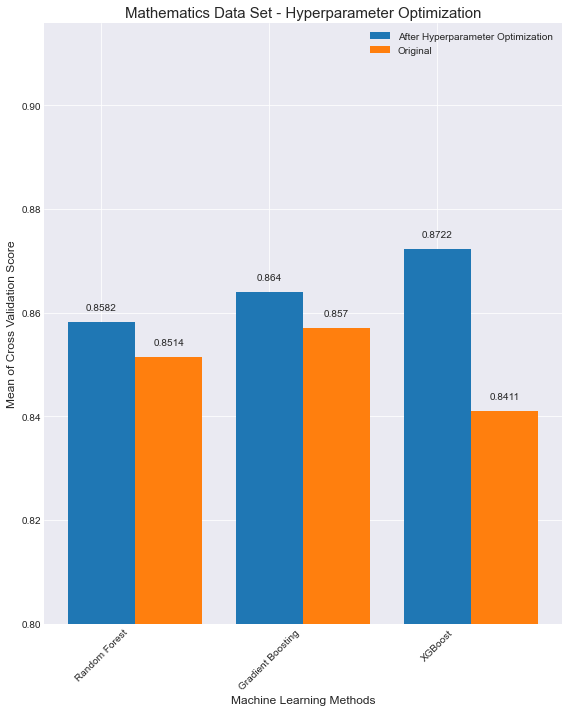

In [150]:
# Cross Validation Score Graph

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(8,10))


score_final_graph = ax.bar(x_indexes, cv_score_final_round, width=width, label = 'After Hyperparameter Optimization')
score_graph = ax.bar(x_indexes+width, cv_score_round,width=width, label = 'Original')


autolabel(score_graph)
autolabel(score_final_graph)

ax.set_ylim(bottom=0.8)
ax.set_ylabel("Mean of Cross Validation Score", size=12)

ax.set_xlabel('Machine Learning Methods', size=12)
ax.set_xticks(ticks = x_indexes)
ax.set_xticklabels(name, rotation=45)

ax.set_title("Mathematics Data Set - Hyperparameter Optimization", size = 15)
plt.legend()

plt.tight_layout()
plt.savefig("Mathematics Data Set - Hyperparameter Optimization.png")
plt.show()

# **Predict on Test sample**

In [155]:
xgboost_final_testsample_score = cross_val_score(xgboost_final,Xm_test, ym_test,cv=cv).mean()
print("Cross Validation score: ",xgboost_final_testsample_score)

Cross Validation score:  0.7465389355272262


In [156]:
name_1 = ['Traning Sample', 'Test Sample']

cv_score_1 = [xgboost_score, xgboost_final_testsample_score]
cv_score_round_1 = [round(score, 4) for score in cv_score_1]

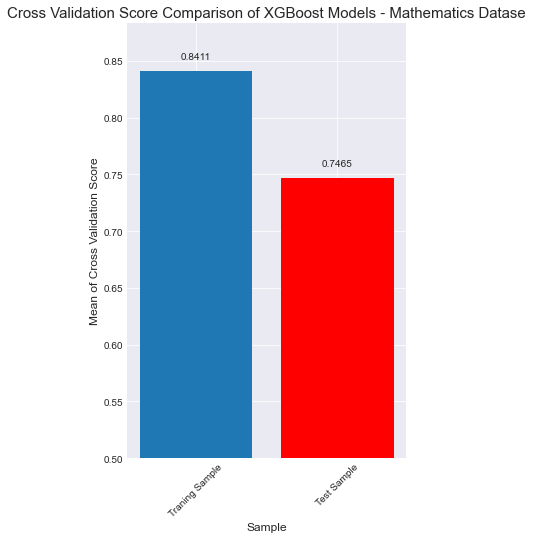

In [159]:
# Cross Validation Score Graph

fig, ax = plt.subplots(figsize=(5,8))

score_graph_1 = ax.bar(name_1, cv_score_round_1)
score_graph_1[1].set_color('r')
autolabel(score_graph_1)

ax.set_ylim(bottom=0.5)    
ax.set_ylabel("Mean of Cross Validation Score", size=12)
ax.set_xlabel('Sample', size=12)
ax.set_title("Cross Validation Score Comparison of XGBoost Models - Mathematics Datase", size = 15)
ax.set_xticks(name_1)
ax.set_xticklabels(name_1, rotation=45)


plt.savefig("Cross Validation Score Comparison of XGBoost Models - Mathematics Datase.png")
plt.show()

# **Test G1 and G2**

In [160]:
x_drop_1 = Xm_test.drop(['G1'], axis=1)

drop_1_score = cross_val_score(xgboost_final,x_drop_1, ym_test,cv=cv).mean()
print("Cross Validation score: ",drop_1_score)

Cross Validation score:  0.7552688885802765


In [161]:
x_drop_2 = Xm_test.drop(['G2'], axis=1)

drop_2_score = cross_val_score(xgboost_final,x_drop_2, ym_test,cv=cv).mean()
print("Cross Validation score: ", drop_2_score)

Cross Validation score:  0.2348648345441747


In [162]:
x_drop_12 = Xm_test.drop(['G1','G2'], axis=1)

drop_12_score = cross_val_score(xgboost_final,x_drop_12, ym_test,cv=cv).mean()
print("Cross Validation score: ", drop_12_score)

Cross Validation score:  -0.8507958226280549


In [163]:
name = ['Keep All Features', 'Drop G1', 'Drop G2', 'Drop G1 and G2']

xgboost_cv_score = [xgboost_final_testsample_score, drop_1_score, drop_2_score, drop_12_score]

xgboost_cv_score_round = [round(score, 4) for score in xgboost_cv_score]

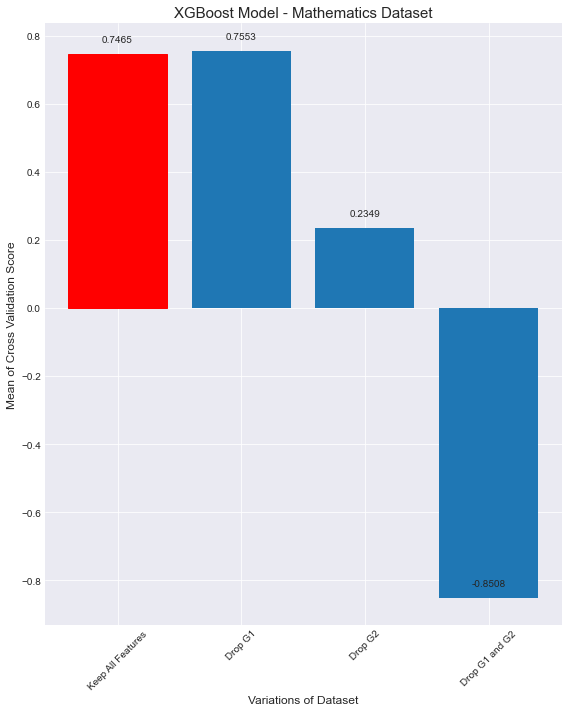

In [164]:
# Cross Validation Score Graph

fig, ax = plt.subplots(figsize=(8,10))

score_graph = ax.bar(name, xgboost_cv_score_round)
score_graph[0].set_color('r')
autolabel(score_graph)
    
ax.set_ylabel("Mean of Cross Validation Score", size=12)
ax.set_xlabel('Variations of Dataset', size=12)
ax.set_title("XGBoost Model - Mathematics Dataset", size=15)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation=45)

plt.tight_layout()
plt.savefig("XGBoost Model - Mathematics Dataset.png")
plt.show()